## Case Study: Match-by-Match Comparison with Visualization

In [1]:
import os
wd = os.path.normpath(os.getcwd() + '/..')
os.chdir(wd)
os.getcwd()

'/home/hyunsung/Workspace/soccercpd'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
form_tags_true = pd.read_csv('data/form_tags_true.csv', header=0)
form_tags_pred = pd.read_csv('data/form_tags_pred.csv', header=0)
form_periods = pd.read_pickle('data/form_periods.pkl')

In [4]:
header = ['session', 'start_time', 'end_time', 'formation']

In [2]:
def show_report(activity_id):
    true_df = form_tags_true[form_tags_true['activity_id'] == activity_id][header]
    if true_df.empty:
        print('\nThere are no human-annotated labels for this match.')
        pred_df = form_periods[form_periods['activity_id'] == activity_id][['session', 'duration', 'formation']]
    else:
        pred_df = form_tags_pred[form_tags_pred['activity_id'] == activity_id][header]
        print('\nFormations annotated by domain experts:')
        print(true_df)
    
    print('\nFormations predicted by SoccerCPD:')
    print(pred_df)
    
    report_path = f'data/report_avg/{activity_id}.png'
    img = mpimg.imread(report_path)
    
    plt.figure(figsize=(15, 10))
    plt.axis('off')
    plt.imshow(img)
    plt.show()

### Case 1: Typical Formation Changes

#### (1) Changing the number of defenders


There are no human-annotated labels for this match.

Formations predicted by FootballCPD:
    session  duration formation
555       1    2760.0       442
556       2    2100.0       442
557       2     900.0       343


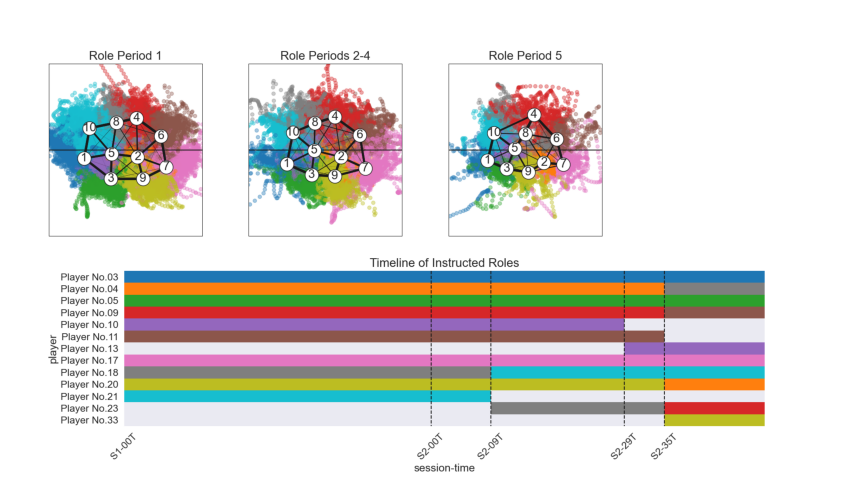

In [16]:
show_report(289)

#### (2) Changing the composition of forwards and midfielders


Formations annotated by domain experts:
    session  start_time  end_time formation
62        1           0        15      4231
63        1          15        46       433
64        2           0        13       433
65        2          13        40       442
66        2          40        48       442

Formations predicted by FootballCPD:
    session  start_time  end_time formation
63        1           0        17      4231
64        1          17        46       433
65        2           0        13       433
66        2          13        40       442
67        2          40        48       442


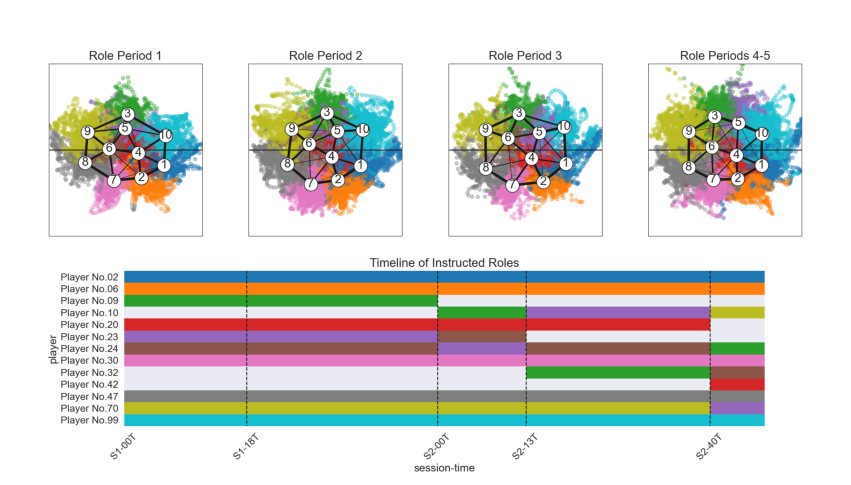

In [7]:
show_report(245)

### Case 2: Typical Examples of Role Changes


Formations annotated by domain experts:
    session  start_time  end_time formation
77        1           0        30      4231
78        1          30        48      4231
79        2           0        13      4231
80        2          13        17       343
81        2          17        23       343
82        2          23        37       343
83        2          37        50       343

Formations predicted by FootballCPD:
    session  start_time  end_time formation
79        1           0        30      4231
80        1          30        48      4231
81        2           0        17       343
82        2          17        23       343
83        2          23        37       343
84        2          37        50       343


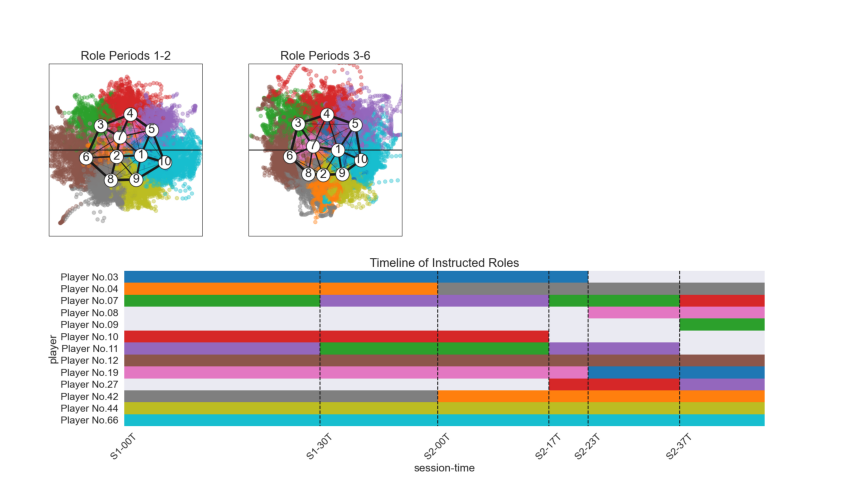

In [20]:
show_report(285)

### Case 3: Failure Cases

#### (1) Detecting unnecessary change-points


There are no human-annotated labels for this match.

Formations predicted by FootballCPD:
    session  duration formation
103       1     480.0       343
104       1    2340.0       343
105       2    2450.0       433
106       2     490.0       433


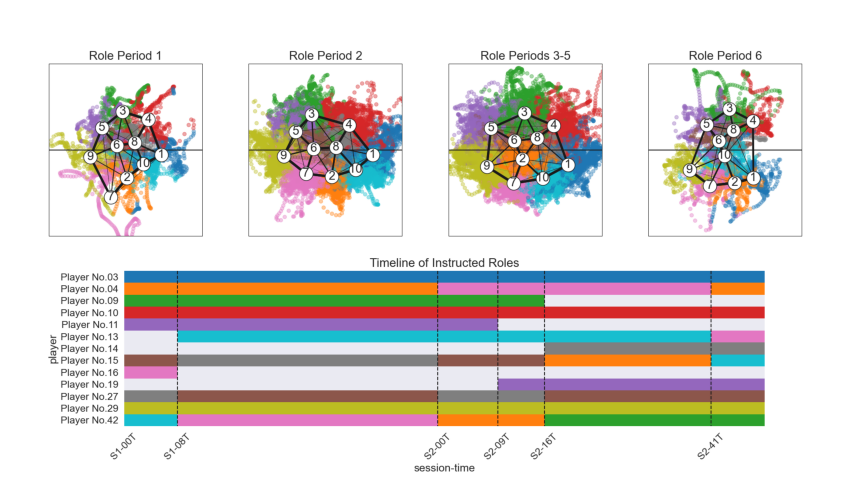

In [52]:
show_report(55)

#### (2) Missing a change-point; (3) Confusing between 4-2-3-1 and 4-4-2


Formations annotated by domain experts:
    session  start_time  end_time formation
32        1           0        32       352
33        1          32        46       442
34        2           0        14      4231
35        2          14        27      4231
36        2          27        36      4231
37        2          36        48       343

Formations predicted by FootballCPD:
    session  start_time  end_time formation
30        1           0        28       352
31        1          28        32      4231
32        1          32        46      4231
33        2           0        14      4231
34        2          14        27      4231
35        2          27        35      4231
36        2          35        48      4231


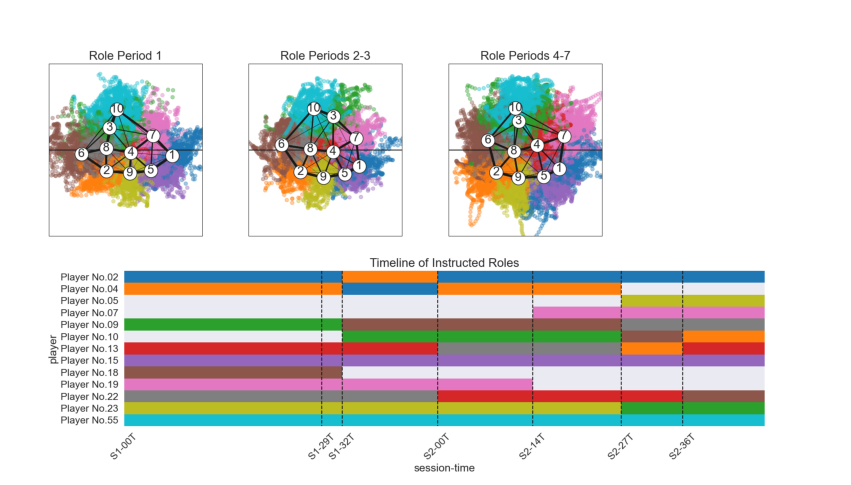

In [13]:
show_report(151)

#### (4) Abnormal formations


Formations annotated by domain experts:
     session  start_time  end_time formation
107        1           0        11    others
108        1          11        46    others
109        2           0        10       442
110        2          10        20       442
111        2          20        26       442
112        2          26        47       442
113        2          47        48       442

Formations predicted by FootballCPD:
     session  start_time  end_time formation
113        1           0        35    others
114        1          35        46    others
115        2           0        10       352
116        2          10        26       352
117        2          26        47       352
118        2          47        48       352


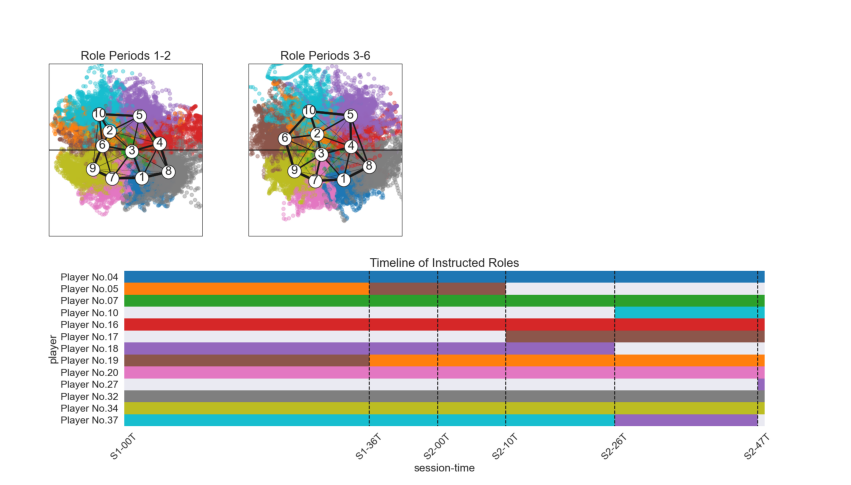

In [15]:
show_report(385)

#### (5) Incomplete player tracking


There are no human-annotated labels for this match.

Formations predicted by FootballCPD:
    session  duration formation
648       1    2820.0      4231


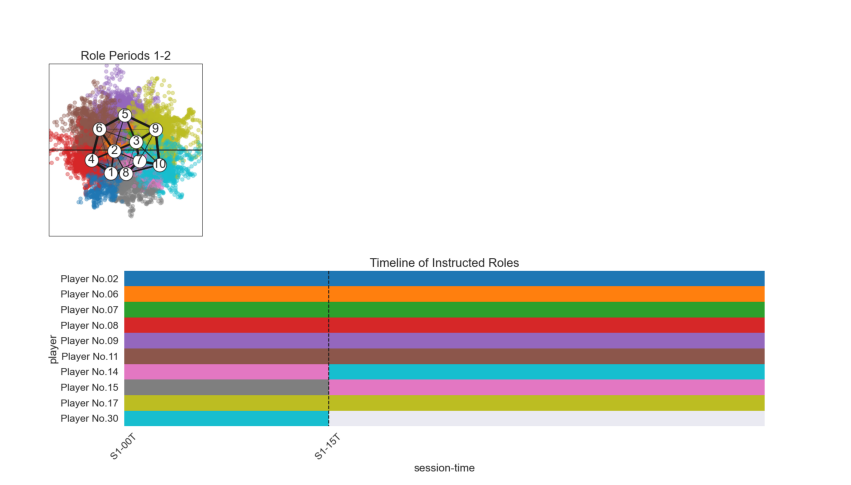

In [21]:
show_report(339)